<h1 align="center">Paquete de onda en mecánica cuántica ondulatoria</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Planteamiento del problema

Sea una partícula cuántica en una dimensión (1D), descrita por la función de onda $\psi(x, t)$

$$\psi(x, 0) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} g(k) e^{ikx} dk \qquad\qquad (1)$$

$$\omega = \frac{\hbar k^2}{2m} \qquad\qquad (2)$$

## 3. Métodos y definiciones

In [2]:
dpi = 300

## 4. Paquetes de onda y relaciones entre $\Delta x$ y $\Delta k$

## 4.2. Ventana: $g(k) = 1$ para $|k| \leq k_0$ y $g(k)=0$ para otro k.

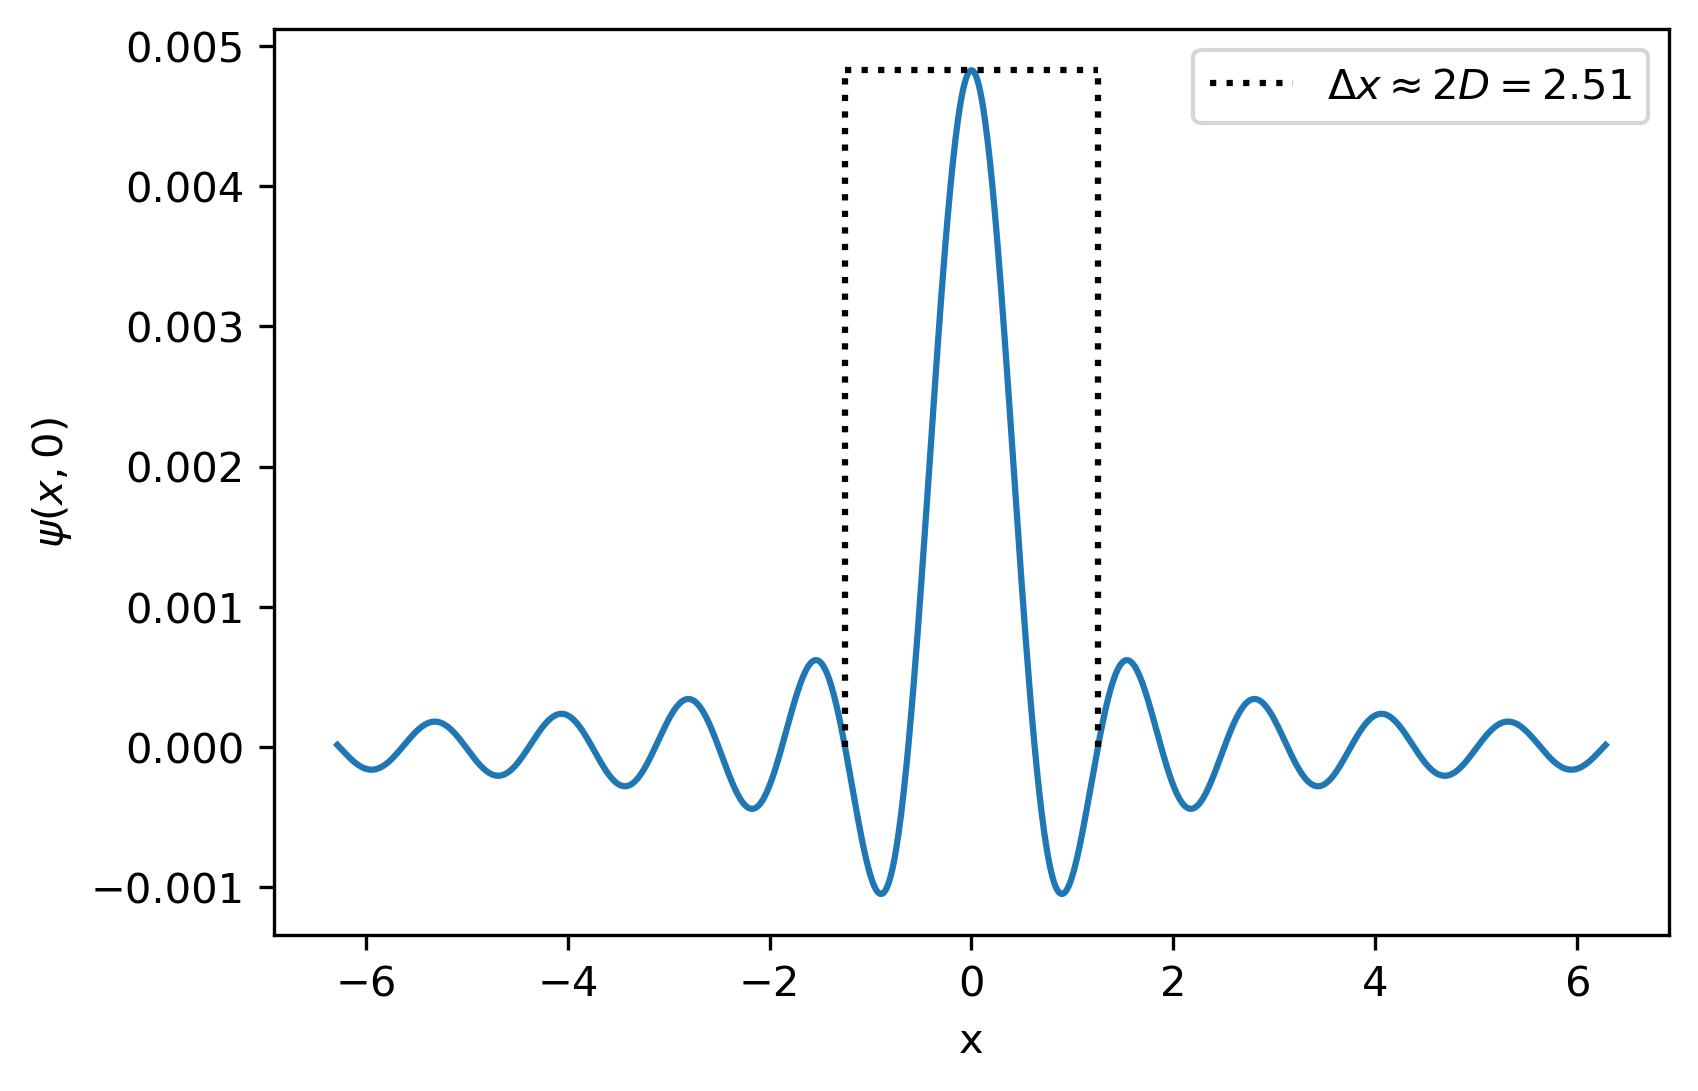

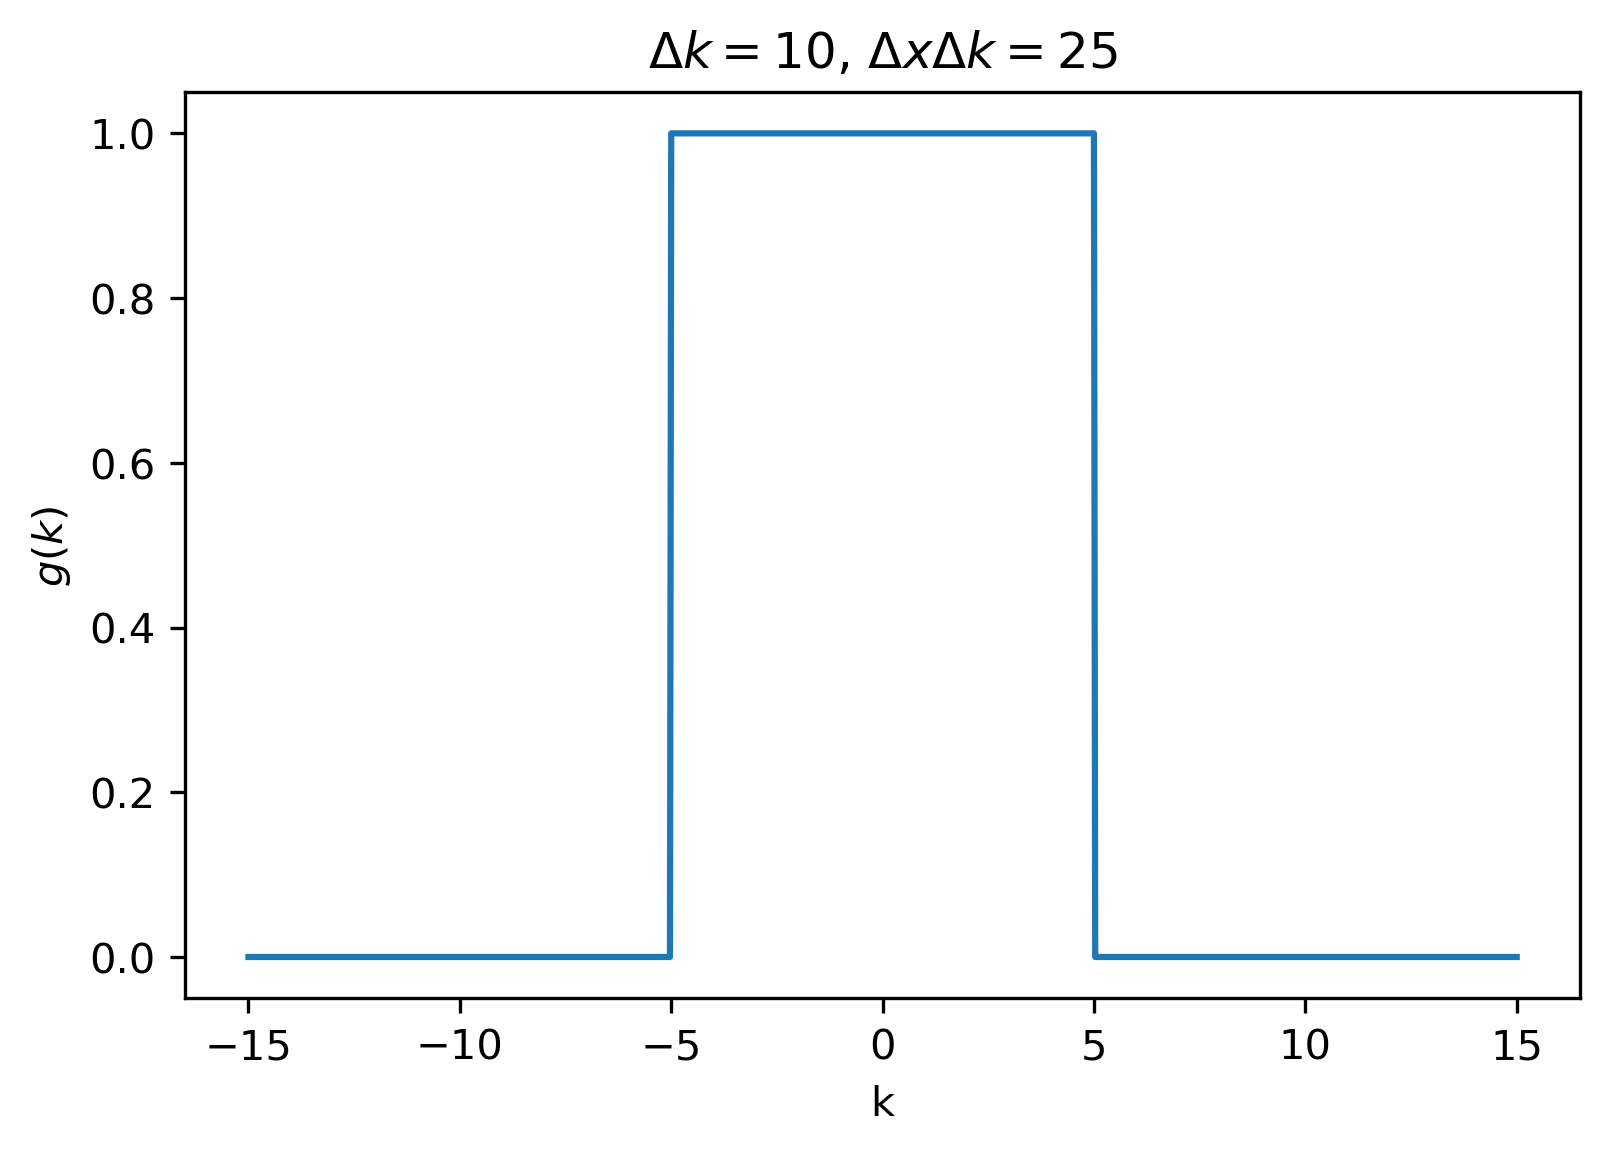

In [3]:
k_o = 5
D = 2*np.pi / k_o
x = np.linspace(-5*D, 5*D, 1000)
k = np.linspace(-3*k_o, 3*k_o, 1000)

g = np.ones(len(k))
g[np.abs(k) > k_o] = 0

psi = np.sum([ g[n]*np.cos(k[n]*x) for n in range(len(g))], axis=0)
psi /= np.trapz(np.abs(psi)**2, x=x)

plt.figure(dpi=dpi)
plt.plot(x, psi)
plt.hlines(max(psi), -D, D, linestyles='dotted', color='black', label=r'$\Delta x \approx 2D = %0.3g$'%(2*D))
plt.vlines(-D, 0, max(psi), linestyles='dotted', color='black')
plt.vlines( D, 0, max(psi), linestyles='dotted', color='black')
plt.xlabel('x')
plt.ylabel(r'$\psi(x, 0)$')
_ = plt.legend()

plt.figure(dpi=dpi)
plt.plot(k, g)
plt.xlabel('k')
plt.ylabel(r'$g(k)$')
_ = plt.title(r'$\Delta k = %0.3g$, $\Delta x \Delta k = %1.2g$' % (2*k_o, 2*D * 2*k_o))

## 4.3. Seno cardinal: $g(k) = \frac{sen(kD)}{kD}$, donde $2D$ es el ancho del paquete de onda.

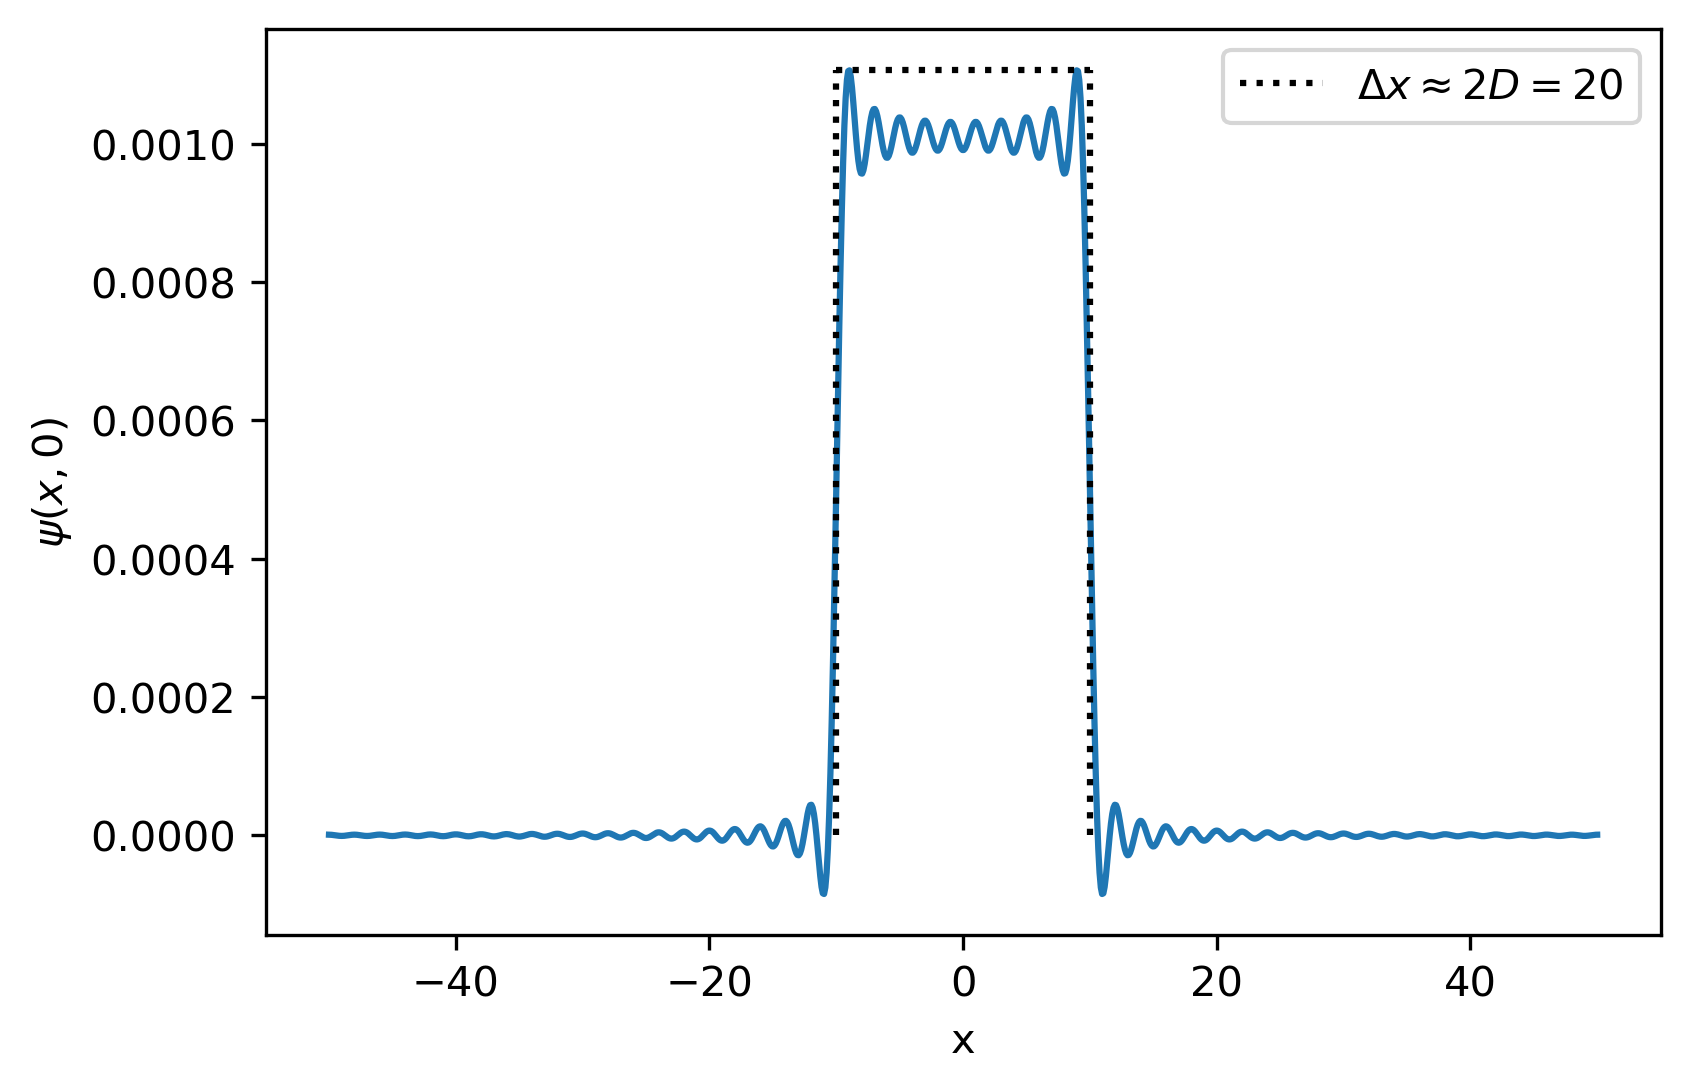

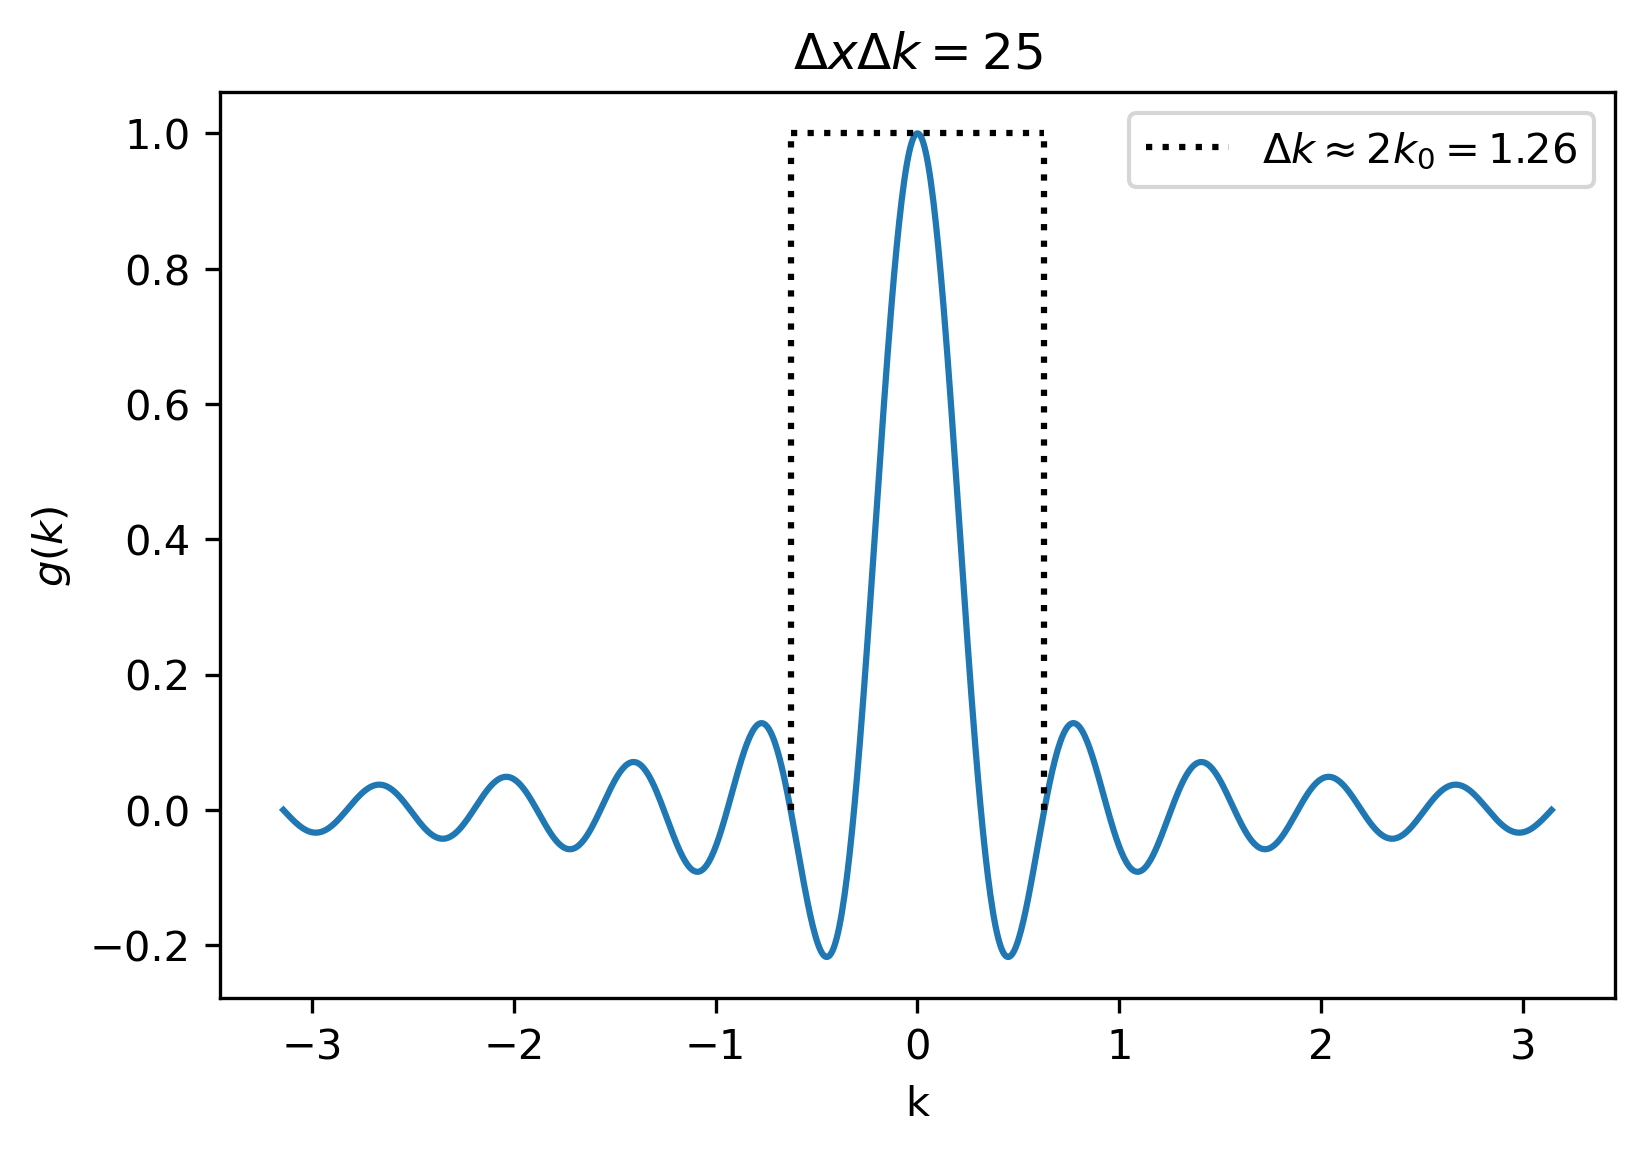

In [4]:
D = 10
k_o = 2 * np.pi / D
x = np.linspace(-5*D, 5*D, 1000)
k = np.linspace(-5*k_o, 5*k_o, 1000)

g = np.sin(k*D) / (k*D)

psi = np.sum([ g[n]*np.cos(k[n]*x) for n in range(len(g))], axis=0)
psi /= np.trapz(np.abs(psi)**2, x=x)

plt.figure(dpi=dpi)
plt.plot(x, psi)
plt.hlines(max(psi), -D, D, linestyles='dotted', color='black', label=r'$\Delta x \approx 2D = %0.3g$'%(2*D))
plt.vlines(-D, 0, max(psi), linestyles='dotted', color='black')
plt.vlines( D, 0, max(psi), linestyles='dotted', color='black')
plt.xlabel('x')
plt.ylabel(r'$\psi(x, 0)$')
_ = plt.legend()

plt.figure(dpi=dpi)
plt.plot(k, g)
plt.hlines(1, -k_o, k_o, linestyles='dotted', color='black', label=r'$\Delta k \approx 2k_0 = %0.3g$'%(2*k_o))
plt.vlines(-k_o, 0, 1, linestyles='dotted', color='black')
plt.vlines( k_o, 0, 1, linestyles='dotted', color='black')
plt.xlabel('k')
plt.ylabel(r'$g(k)$')
plt.title(r'$\Delta x \Delta k = %1.2g$' % (2*D * 2*k_o))
_ = plt.legend()

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

End!